## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combineData = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
combineData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# first, use .unique to pull out the unique data
regimenMice = combineData["Mouse ID"].unique()
regimenDrugs = combineData["Drug Regimen"].unique()
regimenTime = combineData["Timepoint"].unique()
#find the length of each regimen
regMouse = len(regimenMice)
regDrugs = len(regimenDrugs)
regTime = len(regimenTime)
regSample = regDrugs * regTime
#creat a dataframe to summarize the data in columns and rows
dataSummary = pd.DataFrame({"Quantity of Mice": [regMouse],
                         "Quantity of Drug Regimen Treatments": [regDrugs],
                         "Time Measurements": [regTime],
                         "Samples": [regSample]})
dataSummary

,Quantity of Mice,Quantity of Drug Regimen Treatments,Time Measurements,Samples
0,249,10,10,100


In [4]:
#Create df for each mean, median, varience, stdev & SEM and calculate
meanGen = pd.DataFrame(round(combineData.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],2))
meanGen = meanGen.rename(columns={"Tumor Volume (mm3)":"Mean"})
#----------------------------------------------------------------------
medianGen = pd.DataFrame(round(combineData.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],2))
medianGen = medianGen.rename(columns={"Tumor Volume (mm3)":"Median"})
#----------------------------------------------------------------------
varGen = pd.DataFrame(round(combineData.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],2))
varGen = varGen.rename(columns={"Tumor Volume (mm3)":"Variance"})
#----------------------------------------------------------------------
stDev = pd.DataFrame(round(combineData.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],2))
stDev = stDev.rename(columns={"Tumor Volume (mm3)":"StDev"})
#----------------------------------------------------------------------
semGen = pd.DataFrame(round(combineData.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'],2))
senGen = semGen.rename(columns={"Tumor Volume (mm3)":"SEM"})
#----------------------------------------------------------------------
statSum = [meanGen, medianGen, varGen, stDev, semGen]
statSum = pd.concat(statSum,axis=1,join='inner')
statSum
#remember to change mm3
# http://www.apc.univ-paris7.fr/~franco/g4doxy4.10/html/namespacepython_1_1hepunit.html


,Mean,Median,Variance,StDev,Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

Text(0, 0.5, 'Tumor Volume (mm3)')

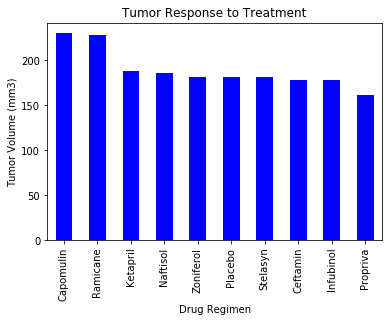

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatmentReg = combineData["Drug Regimen"].value_counts()
barGraph = treatmentReg.plot(kind="bar", facecolor="blue")

plt.title('Tumor Response to Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

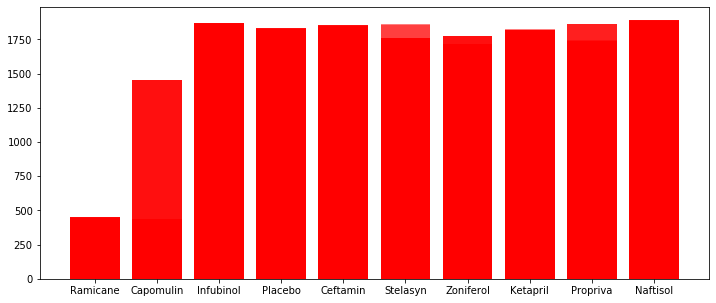

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
xAxis = np.arange(len(combineData))
tickLocations = [value for value in xAxis]

plt.figure(figsize=(12,5))
plt.bar(combineData["Drug Regimen"], xAxis, color='r', alpha=0.5, align="center")
plt.show()

## Pie plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
miceGender = pd.DataFrame(combineData["Sex"].value_counts())
miceGender

,Sex
Male,958
Female,935


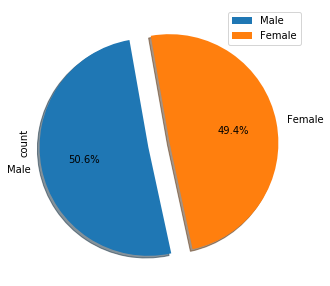

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.
genderDataframe = pd.DataFrame({'count':[958, 935]},
                   index = ['Male', 'Female'])
explode = (0.2,0)
genderPie = genderDataframe.plot.pie(y='count', explode=explode, figsize=(5, 5),autopct="%1.1f%%", shadow=True, startangle=100)


## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen